In [21]:
from datetime import date, timedelta
from constants import *
from phe import *
from phe import plot_cases_by_area as plot_areas, map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

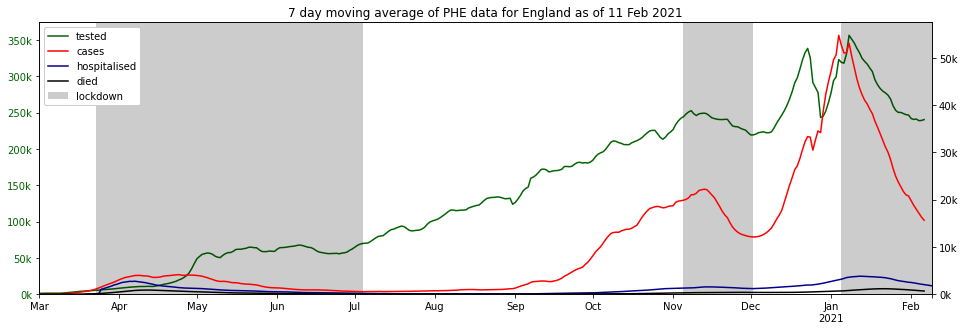

In [2]:
plot_summary(earliest_date='2020-03-01')

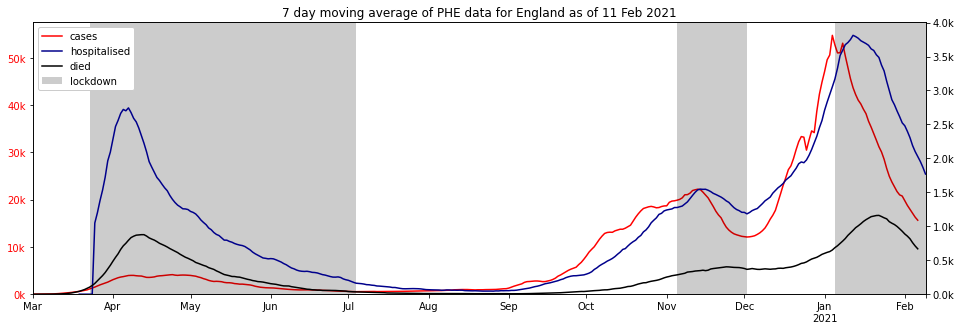

In [3]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,479320.0,11422507.0,10943187.0,56286961,0.851565,19.441780,79.706655
1,Northern Ireland,N92000002,28137.0,353757.0,325620.0,1893667,1.485847,17.195209,81.318944
2,Scotland,S92000003,13195.0,1048747.0,1035552.0,5463300,0.241521,18.954698,80.803782
3,Wales,W92000004,3795.0,684097.0,680302.0,3152879,0.120366,21.577168,78.302466


'partial: 13,509,108'

'full: 524,447'

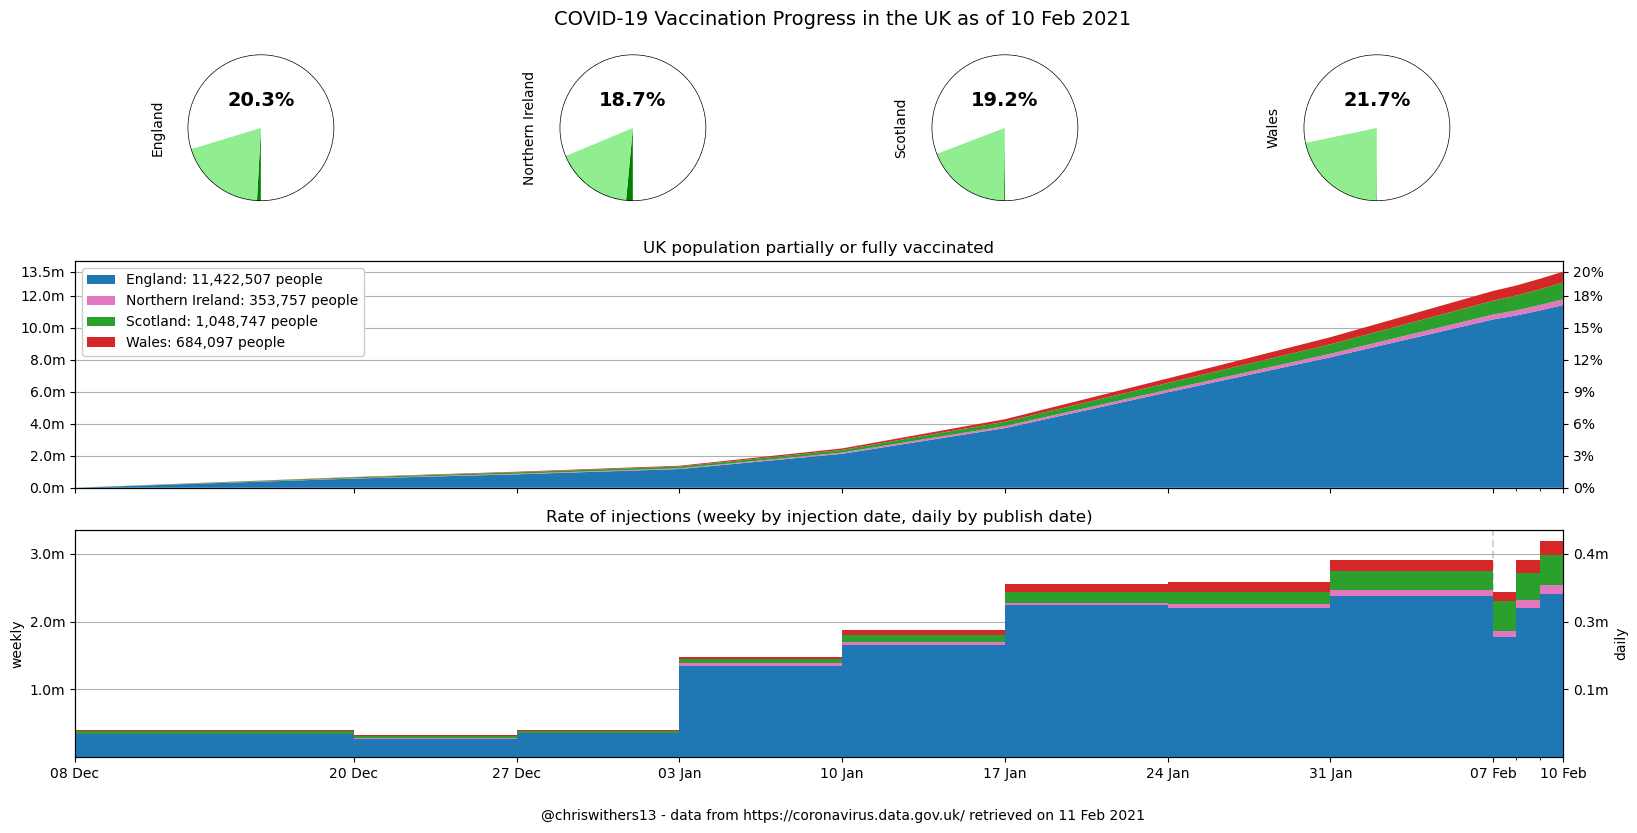

In [4]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

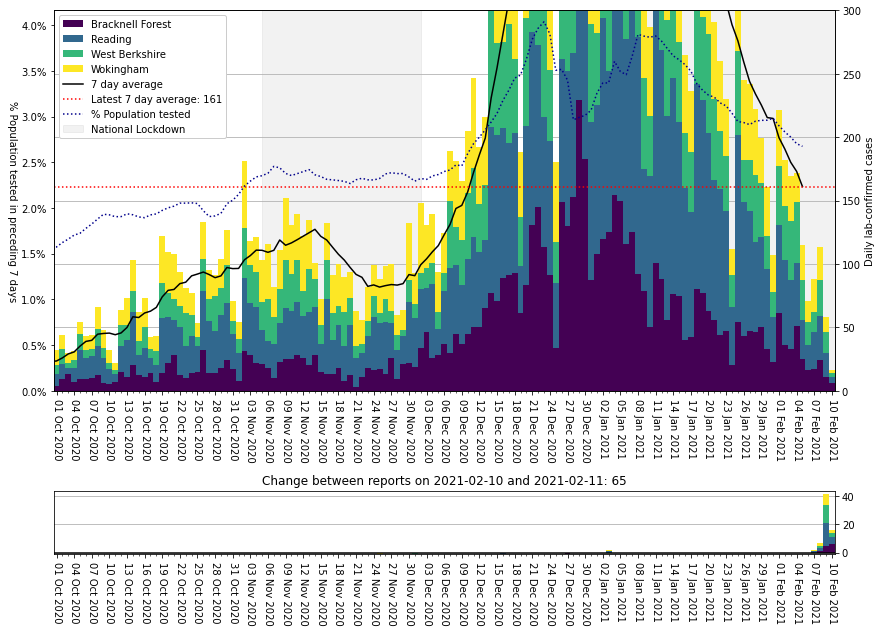

In [13]:
plot_areas(for_date, areas=my_areas, ylim=300)

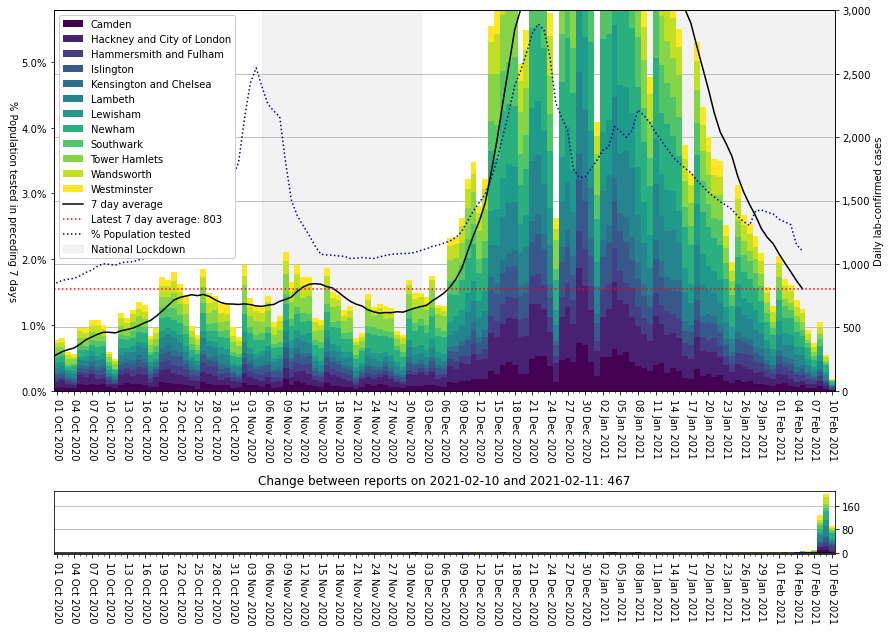

In [14]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [15]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [16]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,326.788335,236.0,2021-02-10
E08000030,Walsall,293.893050,839.0,2021-02-10
E08000028,Sandwell,273.100929,897.0,2021-02-10
E06000002,Middlesbrough,269.541779,380.0,2021-02-10
E08000011,Knowsley,260.502976,393.0,2021-02-10
E08000013,St. Helens,259.157737,468.0,2021-02-10
E06000017,Rutland,250.457084,100.0,2021-02-10
E07000193,East Staffordshire,242.163101,290.0,2021-02-10
E08000001,Bolton,242.044862,696.0,2021-02-10


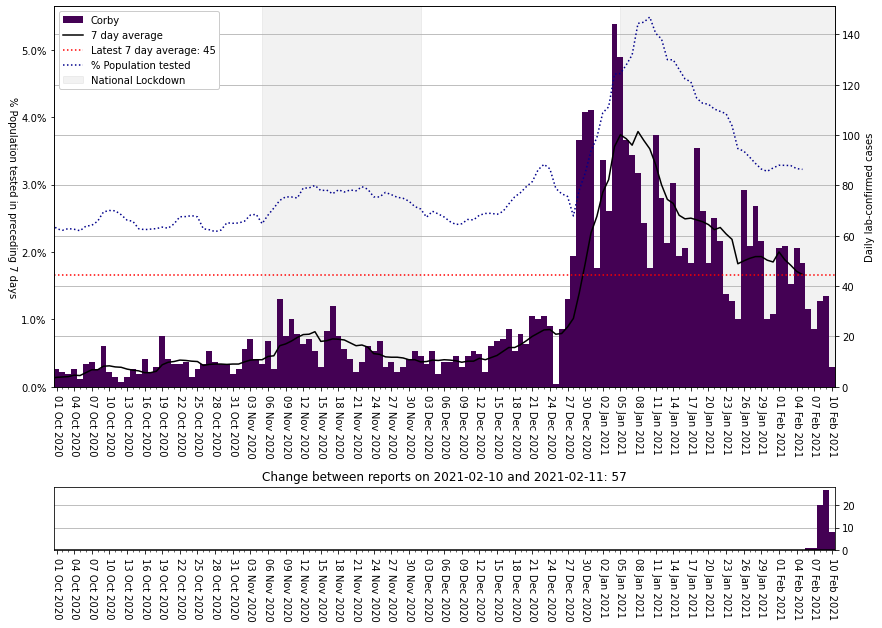

In [17]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [18]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,202.046564,2307.0,2021-02-10
E08000035,Leeds,152.054054,1206.0,2021-02-10
E08000032,Bradford,189.893585,1025.0,2021-02-10
E08000012,Liverpool,201.790210,1005.0,2021-02-10
E08000003,Manchester,171.834359,950.0,2021-02-10
E08000028,Sandwell,273.100929,897.0,2021-02-10
E08000030,Walsall,293.893050,839.0,2021-02-10
S12000049,Glasgow City,131.096790,830.0,2021-02-10
E06000047,County Durham,152.048505,806.0,2021-02-10


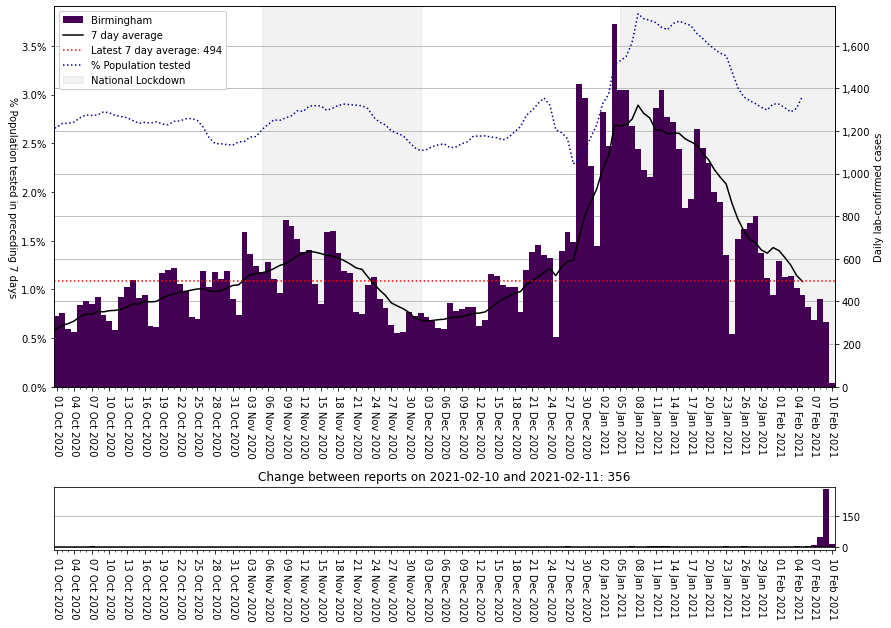

In [19]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [22]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)

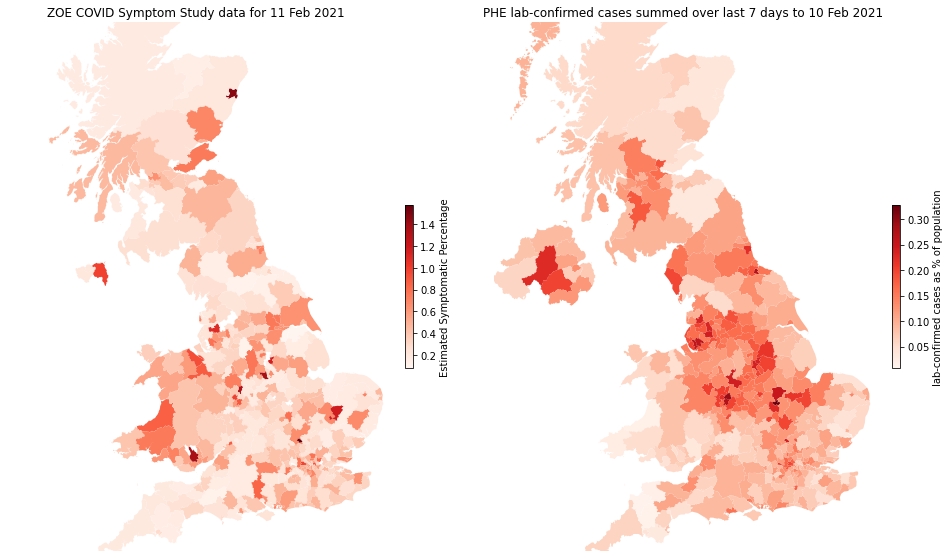

In [23]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, phe_recent_geo, phe_recent_title)   

In [24]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, phe_recent_geo, phe_recent_title)

Loading BokehJS ...

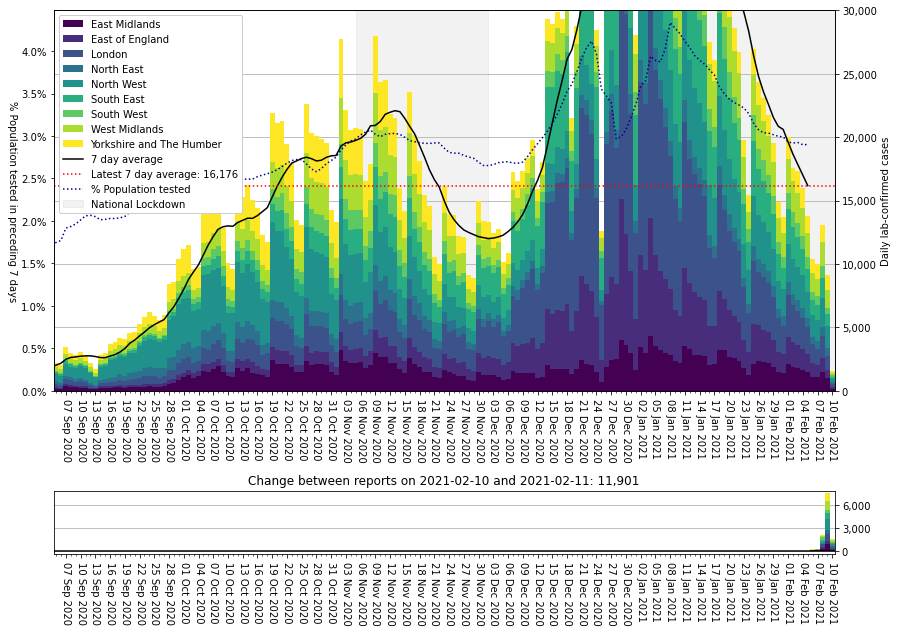

In [25]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

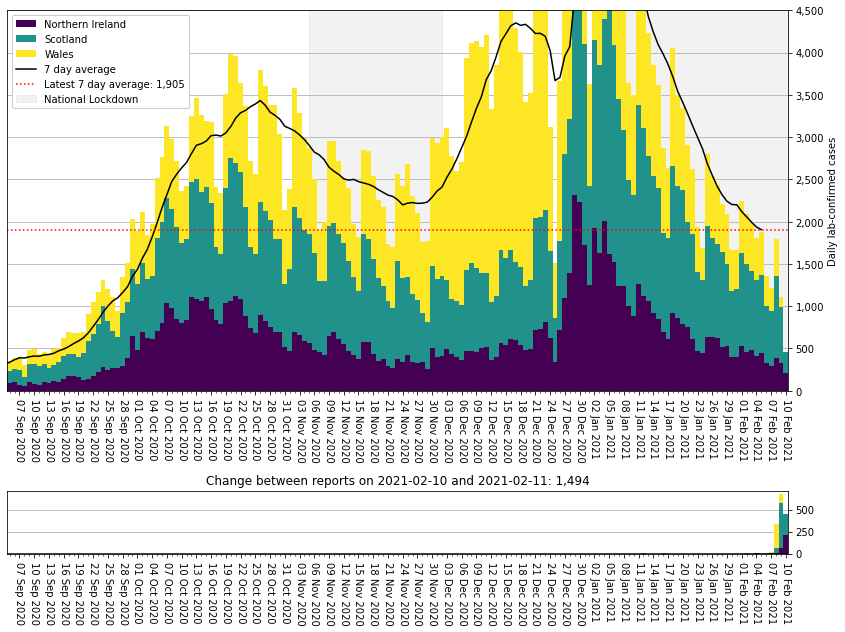

In [26]:
plot_areas(for_date, area_type=nation, areas=[scotland, northern_ireland, wales], show_testing=False, ylim=4_500, earliest='2020-09-05')